In [142]:
import pandas as pd              
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression, r_regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from scipy.stats import probplot



from sklearn.metrics import mean_squared_error,mean_absolute_error

#to ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',500)

In [143]:
#import data
Train=pd.read_csv('Train.csv')
Test=pd.read_csv('Test.csv')
Train.shape ,Test.shape

((8523, 12), (5681, 11))

In [144]:
Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [145]:
Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


We should combine the Train and Test datasets, so that we only need to perform the data processing once.

In [146]:
# merge Train and Test
df=Train.append(Test)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [147]:
df.shape

(14204, 12)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [149]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Let's explore the features within our dataset

In [150]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [151]:
for column in df.columns:
    unique_values_counts = df[column].value_counts()
    print(f"Column '{column}' has the following unique values and their counts:")
    print(unique_values_counts)
    print("\n")

Column 'Item_Identifier' has the following unique values and their counts:
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64


Column 'Item_Weight' has the following unique values and their counts:
17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
15.100    111
19.350    109
15.700    102
16.700    100
15.600    100
17.750     99
9.800      99
20.250     97
12.600     96
16.000     95
10.195     93
15.850     93
17.700     93
9.300      93
20.700     92
18.850     92
14.000     92
12.500     92
15.000     91
19.700     91
17.850     89
18.250     89
16.750     89
9.600      85
12.850     84
9.500      82
11.500     82
20.200     82
12.100     82
9.195      82
19.200     79
15.200     78
15.500     77
13.350     77
12.300     77
13.500     76
17.250     76
19.600     76
20.350     75
14.150     75
10.100     75
16.200     75
16.500     7

We can observe that the 'Item_Fat_Content' feature contains variations such as LF, Low Fat, and low fat, which all signify the same concept. Similarly, we have reg and Regular, which are equivalent. 


To eliminate this redundancy, we will perform renaming of these categories into Low Fat and Regular

In [152]:
# Replace inconsistent values in 'Item_Fat_Content' column
df['Item_Fat_Content'].replace({'LF': 'Low Fat','low fat': 'Low Fat','reg': 'Regular'}, inplace=True)

# Visualisation

Date feature

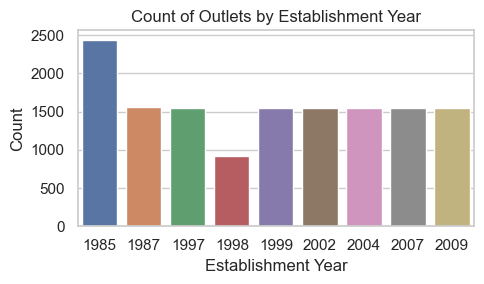

In [153]:
fig, axes = plt.subplots(figsize=(5, 3))

sns.countplot(data=df, x='Outlet_Establishment_Year', ax=axes)
axes.set_title('Count of Outlets by Establishment Year')
axes.set_xlabel('Establishment Year')
axes.set_ylabel('Count')

plt.tight_layout()
plt.show()


Categorical features

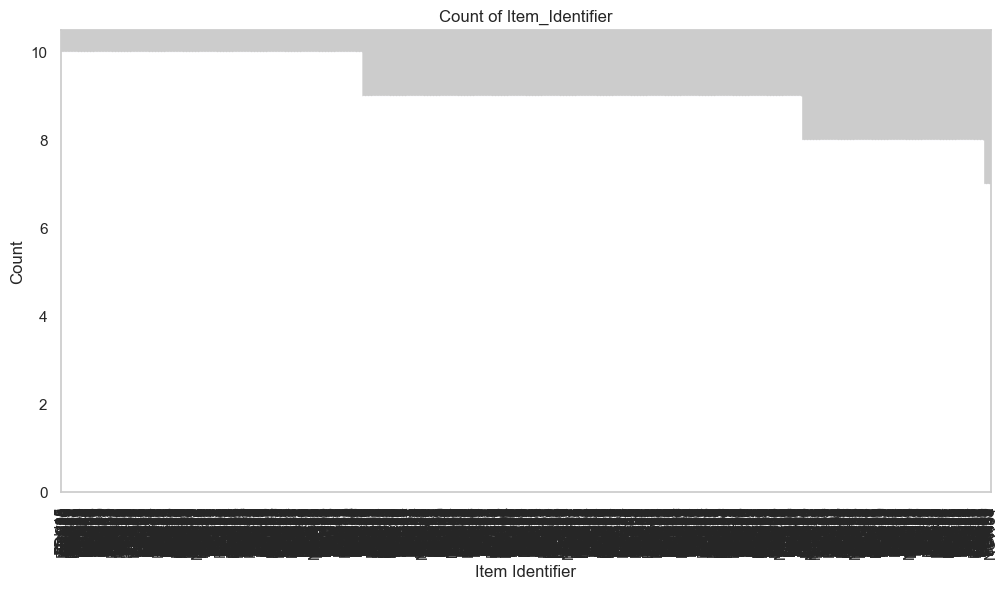

In [154]:
plt.figure(figsize=(12, 6))
df['Item_Identifier'].value_counts().plot(kind='bar', color='blue')

plt.xlabel('Item Identifier')
plt.ylabel('Count')
plt.title('Count of Item_Identifier')

plt.show()


plots of the other categorical features

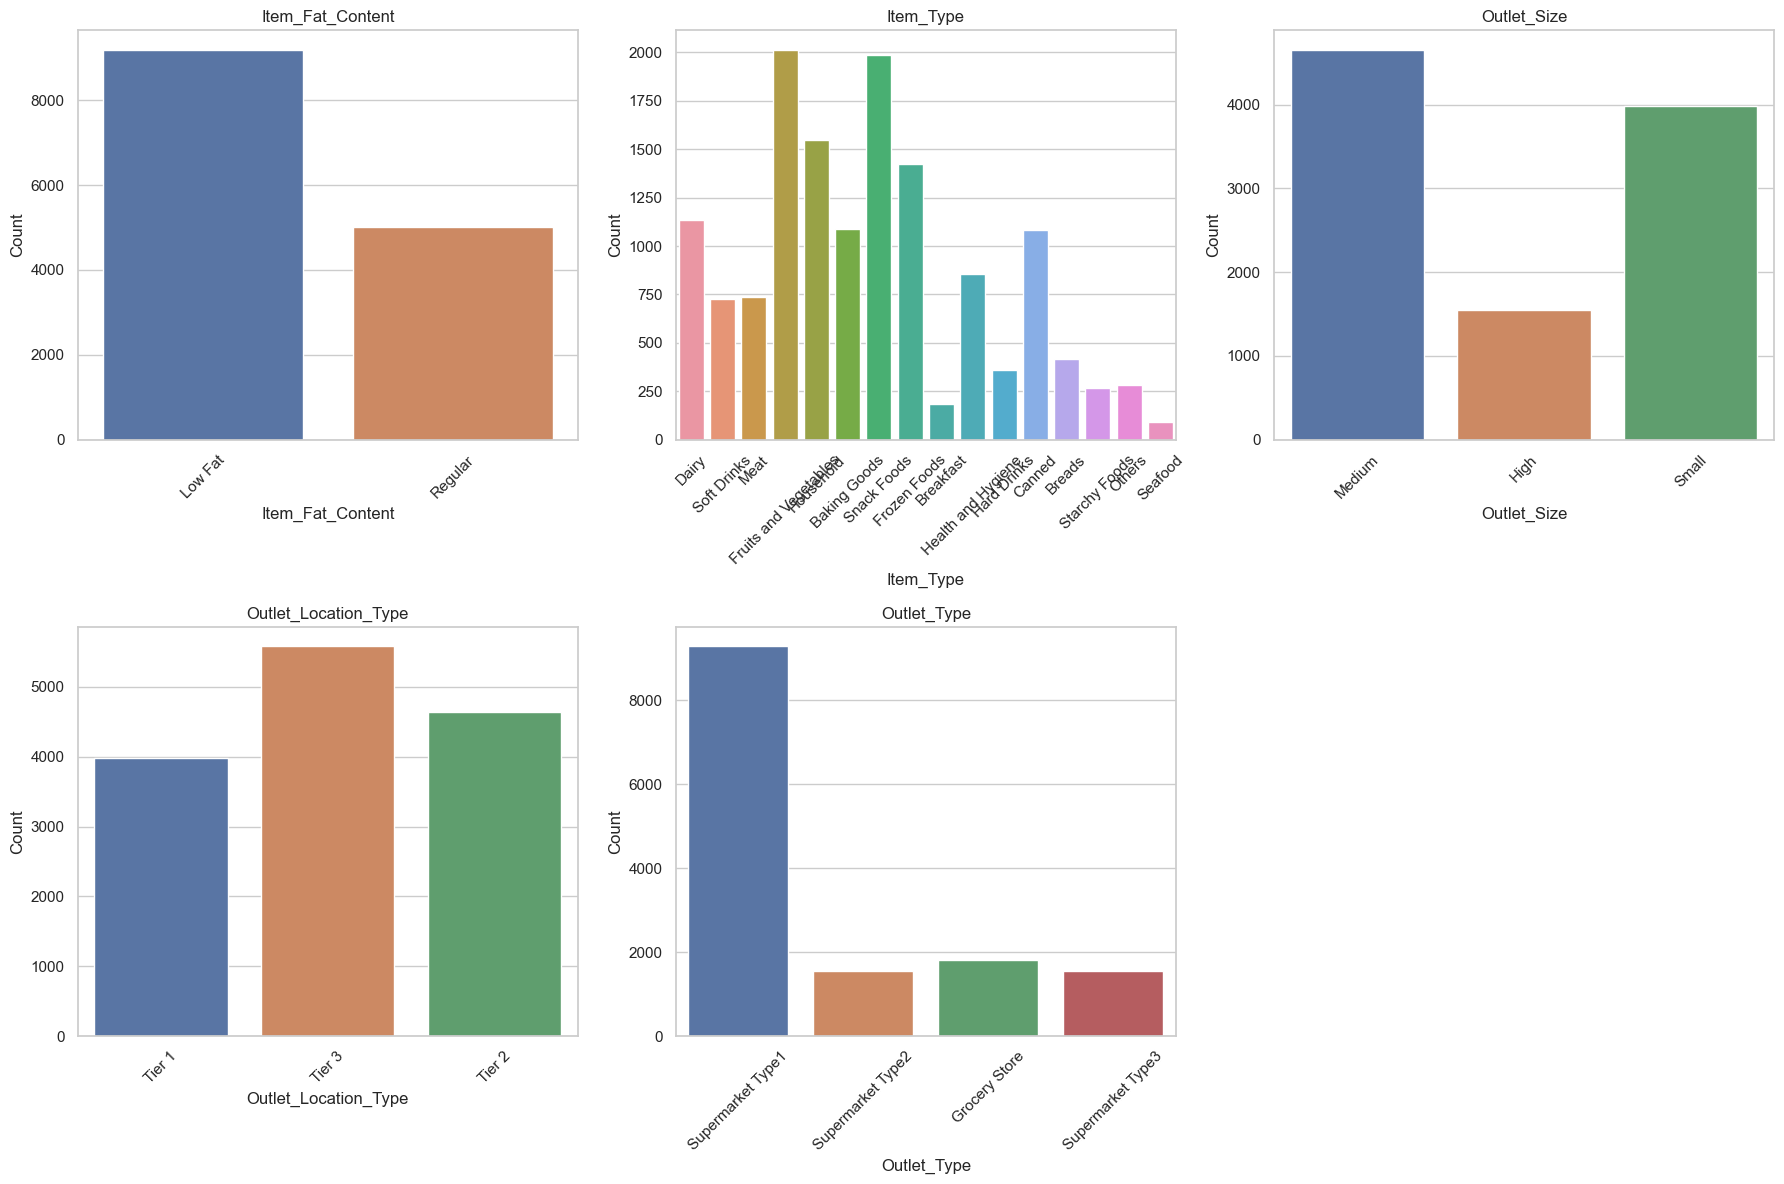

In [155]:
# Create a figure with 3 subplots per row
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.ravel()

# Categorical columns
categorical_columns = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

# Use each subplot to plot count bar plots for the categorical columns
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any remaining empty subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Now,numerical features

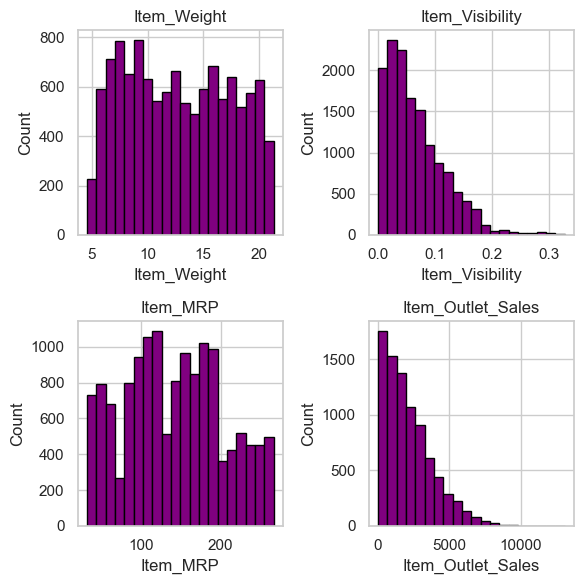

In [156]:
# Create a figure with 2 subplots per row
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
axes = axes.ravel()

# Use the first subplot to plot histograms
first_columns = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
for i, column in enumerate(first_columns):
    axes[i].hist(df[column], bins=20, color='purple', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

As we can infer from the previous code, there are certain categorical features that require conversion into numerical ones so that our ML models work properly.

However, before proceeding with this conversion, it is imperative to address any missing values present within these categorical features.

# Missing values

In [157]:
# number of missing values for each column
print("Number of missing values for each column:\n")
count_missing_values_by_col=(df.isnull().sum())
print(count_missing_values_by_col)

som = count_missing_values_by_col.sum()
print("Total:", som)
print()
print(round(som / (df.shape[0] * df.shape[1]) * 100), "% of the dataset")


Number of missing values for each column:

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64
Total: 12136

7 % of the dataset


'Outlet_Size' is a categorical feature with missing values.
From the previous plot of this feature of this feature we know the mode is 'Medium '

In [158]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

As we can see 'Medium' is the dominant value in this column,we will fill the missing values in 'Outlet_Size' with 'Medium'

In [159]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [160]:
df['Outlet_Size'].isnull().sum()

0

We also have missing values in 'Item_Weight',so we are going to fill them with the mean

In [161]:
# Filling the missing values  with the mean 
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [162]:
# checking for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [163]:
# checking for duplicates
Train.duplicated().sum()

0

# Handling Categorical features

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


Label encoding

In [165]:
df['Item_Fat_Content']=df['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})
df['Outlet_Size']=df['Outlet_Size'].map({'High': 3, 'Medium': 2,'Small':1})
df['Outlet_Type']=df['Outlet_Type'].map({'Grocery Store': 1, 'Supermarket Type1': 2,'Supermarket Type2':3,'Supermarket Type3':4})
df['Outlet_Location_Type']=df['Outlet_Location_Type'].map({'Tier 1': 1,'Tier 2': 2,'Tier 3': 3})

we have a particular case with the feature 'Outlet_Identifier' ,we can convert the Outlet_Identifier column into numerical values by extracting the numeric part from each string and converting it to an integer

In [166]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].str.extract(r'(\d+)').astype(int)
# The 'Outlet_Identifier' column will now contain numerical values
print(df['Outlet_Identifier'])

0       49
1       18
2       49
3       10
4       13
        ..
5676    46
5677    18
5678    45
5679    17
5680    45
Name: Outlet_Identifier, Length: 14204, dtype: int32


One hot encoding

In [167]:
# Convert 'Item_Type' using One-Hot Encoding
df = pd.get_dummies(df, columns=['Item_Type'], drop_first=True)

Frequency encoding

In [168]:
# Convert'Item_Identifier'using Frequency Encoding using the count of each value.
item_identifier_counts = df['Item_Identifier'].value_counts()
df['Item_Identifier'] = df['Item_Identifier'].map(item_identifier_counts)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  14204 non-null  int64  
 1   Item_Weight                      14204 non-null  float64
 2   Item_Fat_Content                 14204 non-null  int64  
 3   Item_Visibility                  14204 non-null  float64
 4   Item_MRP                         14204 non-null  float64
 5   Outlet_Identifier                14204 non-null  int32  
 6   Outlet_Establishment_Year        14204 non-null  int64  
 7   Outlet_Size                      14204 non-null  int64  
 8   Outlet_Location_Type             14204 non-null  int64  
 9   Outlet_Type                      14204 non-null  int64  
 10  Item_Outlet_Sales                8523 non-null   float64
 11  Item_Type_Breads                 14204 non-null  uint8  
 12  Item_Type_Breakfast

Now,there is no categorical feature in our dataset,but let's convert the dummy features into integers

In [170]:
#convert the dummy features into integer features
df['Item_Type_Breads']=df['Item_Type_Breads'].astype(int)
df['Item_Type_Breakfast']=df['Item_Type_Breakfast'].astype(int)
df['Item_Type_Canned']=df['Item_Type_Canned'].astype(int)
df['Item_Type_Dairy']=df['Item_Type_Dairy'].astype(int)
df['Item_Type_Frozen Foods']=df['Item_Type_Frozen Foods'].astype(int)
df['Item_Type_Fruits and Vegetables']=df['Item_Type_Fruits and Vegetables'].astype(int)
df['Item_Type_Hard Drinks']=df['Item_Type_Hard Drinks'].astype(int)
df['Item_Type_Health and Hygiene']=df['Item_Type_Health and Hygiene'].astype(int)
df['Item_Type_Household']=df['Item_Type_Household'].astype(int)
df['Item_Type_Meat']=df['Item_Type_Meat'].astype(int)
df['Item_Type_Others']=df['Item_Type_Others'].astype(int)
df['Item_Type_Seafood']=df['Item_Type_Seafood'].astype(int)
df['Item_Type_Snack Foods']=df['Item_Type_Snack Foods'].astype(int)
df['Item_Type_Soft Drinks']=df['Item_Type_Soft Drinks'].astype(int)
df['Item_Type_Starchy Foods']=df['Item_Type_Starchy Foods'].astype(int)


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  14204 non-null  int64  
 1   Item_Weight                      14204 non-null  float64
 2   Item_Fat_Content                 14204 non-null  int64  
 3   Item_Visibility                  14204 non-null  float64
 4   Item_MRP                         14204 non-null  float64
 5   Outlet_Identifier                14204 non-null  int32  
 6   Outlet_Establishment_Year        14204 non-null  int64  
 7   Outlet_Size                      14204 non-null  int64  
 8   Outlet_Location_Type             14204 non-null  int64  
 9   Outlet_Type                      14204 non-null  int64  
 10  Item_Outlet_Sales                8523 non-null   float64
 11  Item_Type_Breads                 14204 non-null  int32  
 12  Item_Type_Breakfast

# Outliers

Check the Outliers

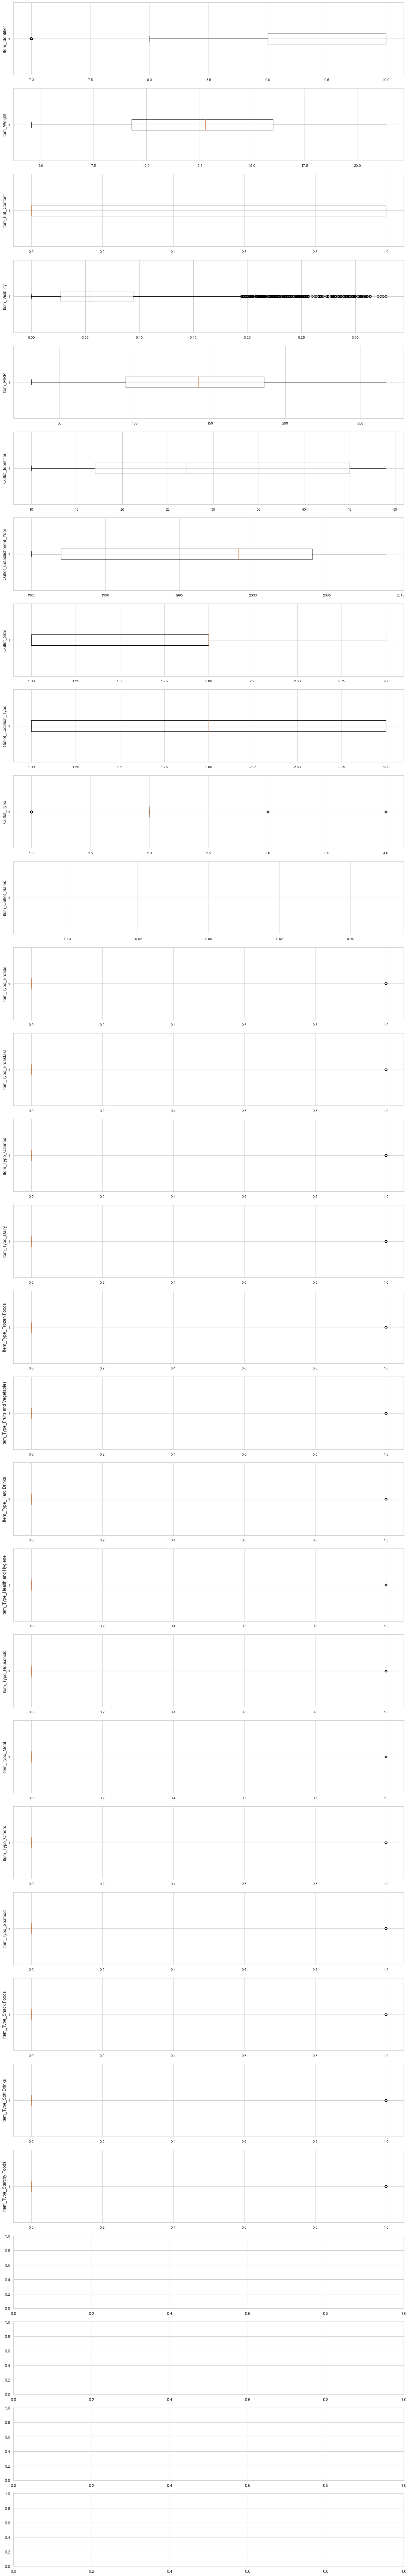

In [173]:
# Box Plots
fig, axs = plt.subplots(30, 1, dpi=95, figsize=(16, 100)) 
i = 0

for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col, fontsize=12)  
    axs[i].tick_params(axis='both', which='major', labelsize=10)  
    i += 1

plt.subplots_adjust(hspace=0.8) 


plt.tight_layout()

plt.show()


Drop the outliers from the columns that have outliers

In [175]:
import numpy as np

outlier_col = ['Item_Identifier', 'Outlet_Type', 'Item_Type_Breads', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables','Item_Type_Household', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods']

for col in outlier_col:
    # Identify the quartiles
    q1, q3 = np.percentile(df[col], [25, 75])
    # Calculate the interquartile range
    iqr = q3 - q1
    # Calculate the lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    # Drop the outliers from the original Train DataFrame
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

checking if the outliers were actually removed

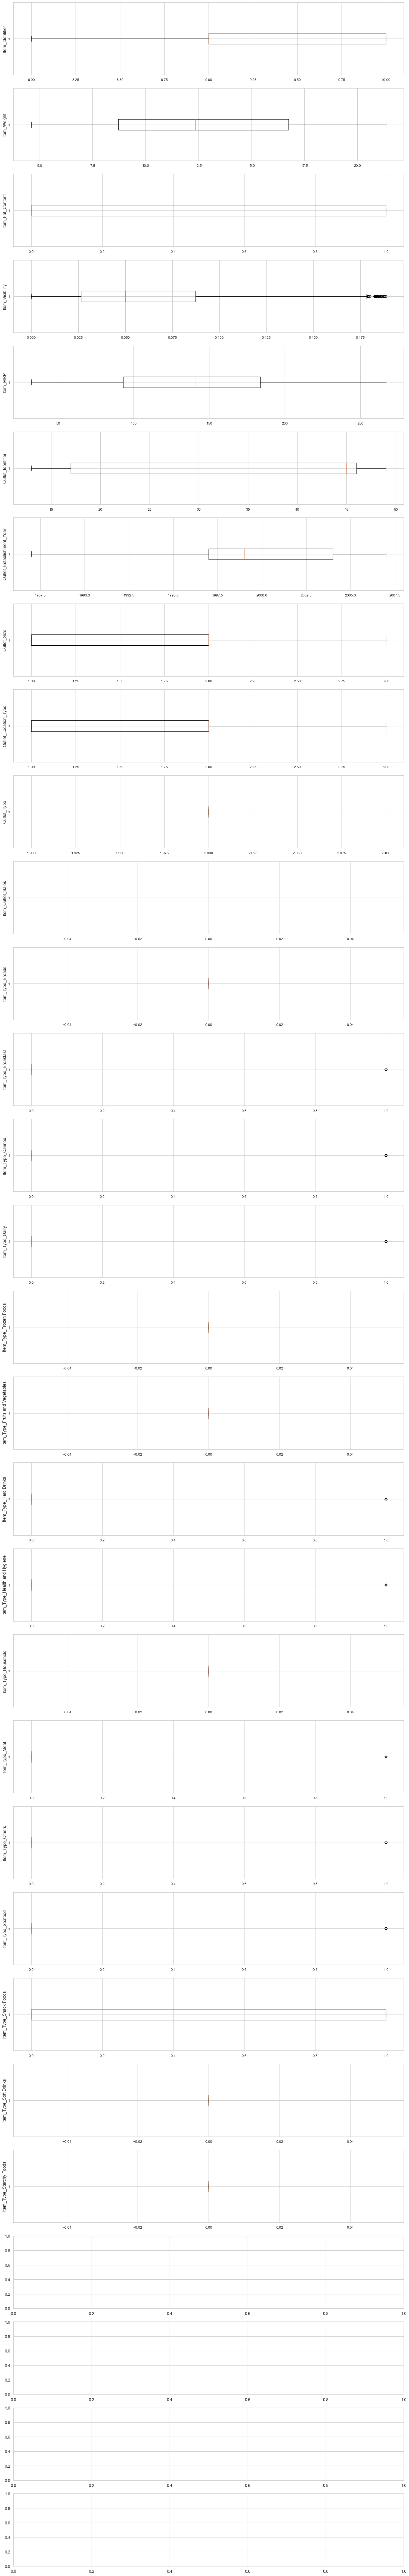

In [176]:
# Box Plots
fig, axs = plt.subplots(30, 1, dpi=95, figsize=(16, 100)) 
i = 0

for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col, fontsize=12) 
    axs[i].tick_params(axis='both', which='major', labelsize=10)  
    i += 1


plt.subplots_adjust(hspace=0.8)  

plt.tight_layout()

plt.show()

In [177]:
# number of missing values for each column
print("Number of missing values for each column:\n")
count_missing_values_by_col=(df.isnull().sum())
print(count_missing_values_by_col)

som = count_missing_values_by_col.sum()
print("Total:", som)
print()
print(round(som / (df.shape[0] * df.shape[1]) * 100), "% of the dataset")


Number of missing values for each column:

Item_Identifier                       0
Item_Weight                           0
Item_Fat_Content                      0
Item_Visibility                       0
Item_MRP                              0
Outlet_Identifier                     0
Outlet_Establishment_Year             0
Outlet_Size                           0
Outlet_Location_Type                  0
Outlet_Type                           0
Item_Outlet_Sales                  2056
Item_Type_Breads                      0
Item_Type_Breakfast                   0
Item_Type_Canned                      0
Item_Type_Dairy                       0
Item_Type_Frozen Foods                0
Item_Type_Fruits and Vegetables       0
Item_Type_Hard Drinks                 0
Item_Type_Health and Hygiene          0
Item_Type_Household                   0
Item_Type_Meat                        0
Item_Type_Others                      0
Item_Type_Seafood                     0
Item_Type_Snack Foods                

# Correlation

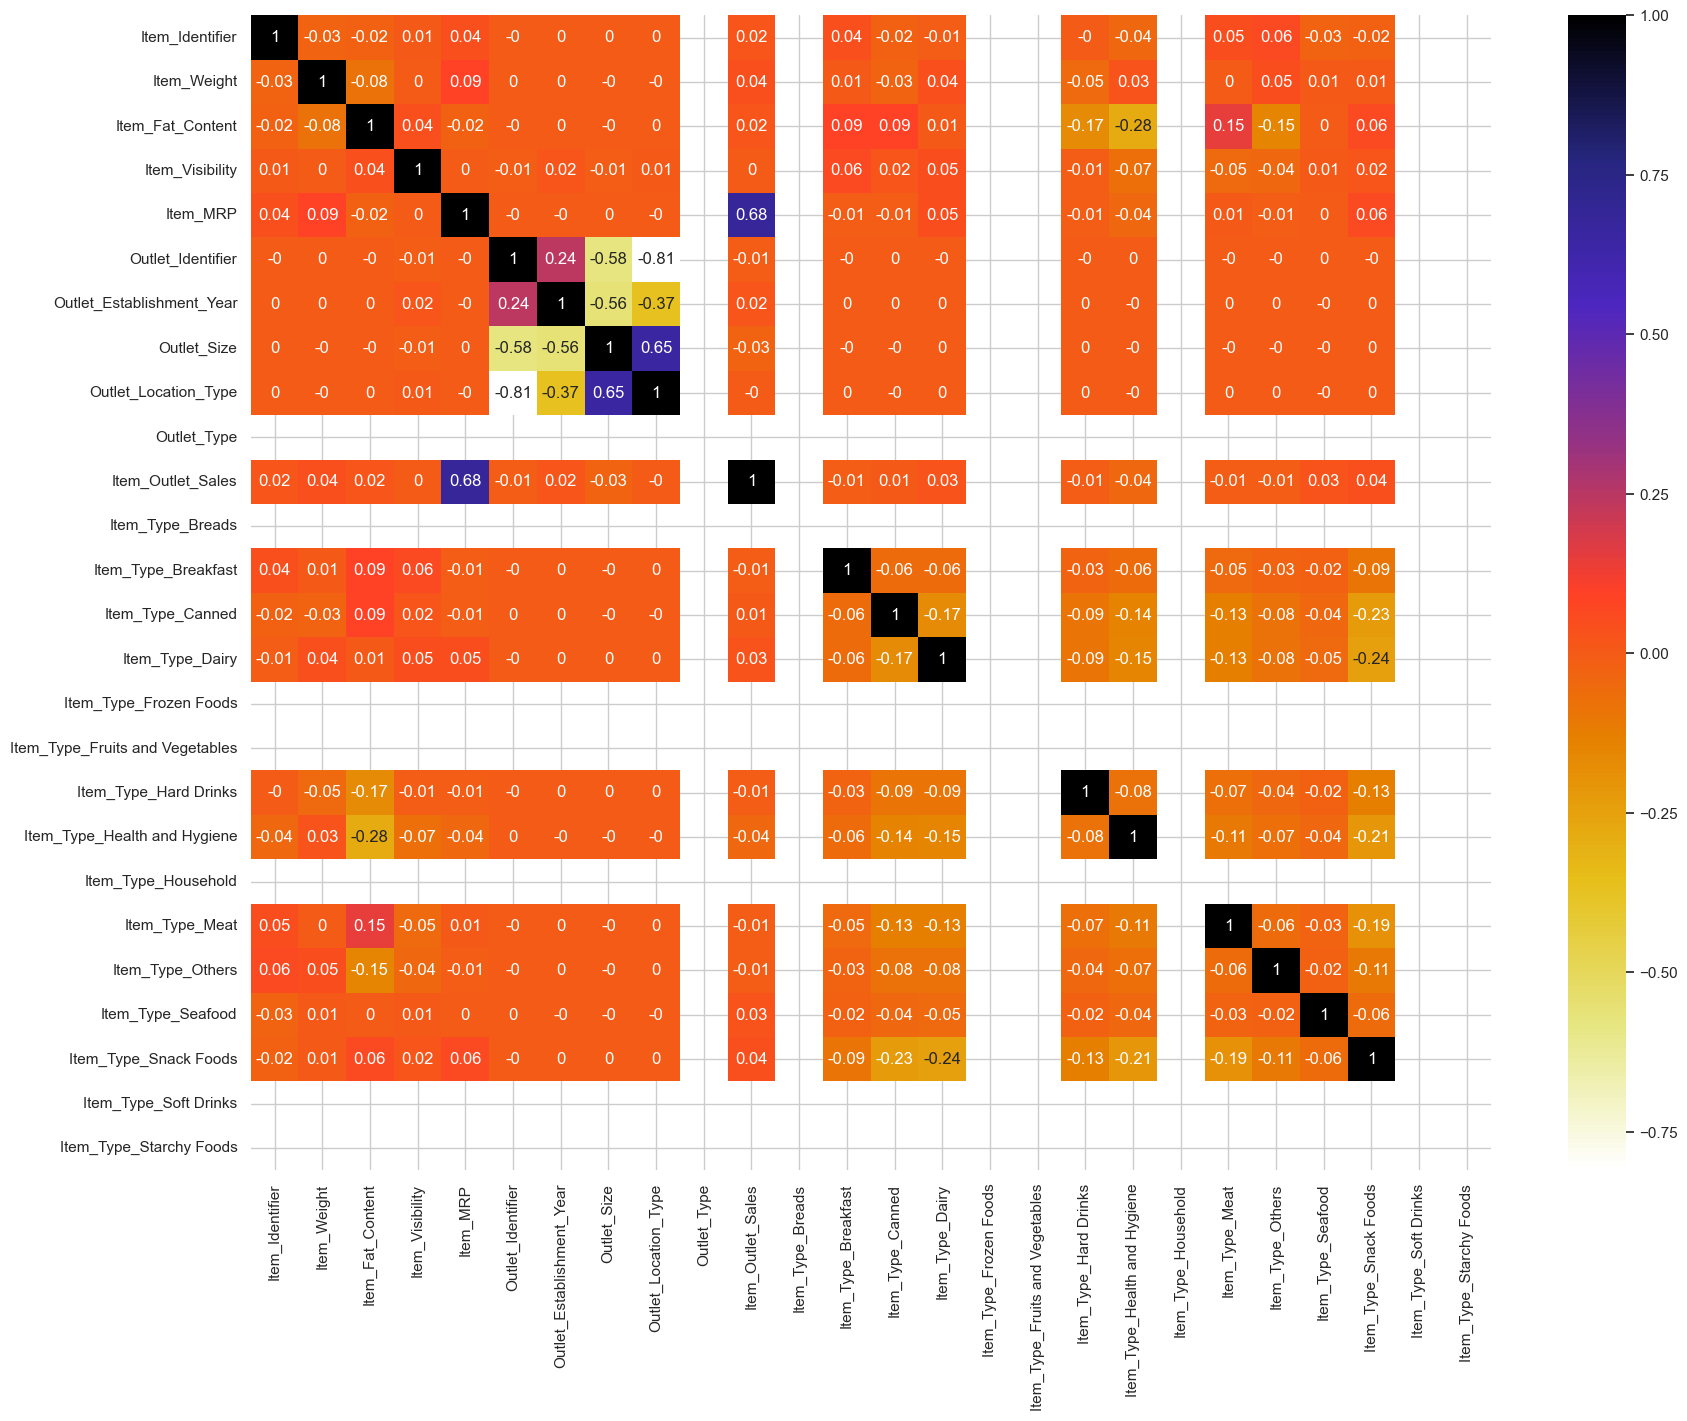

In [178]:
# plot the correlation matrix
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr.round(2), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


Observing the correlation matrix, the majority of features do not have a strong correlation with our target variable, 'Item_Outlet_Sales'. 

Let's calculate the exact degree of correlation between each feature and 'Item_Outlet_Sales'.






In [179]:
# Calculate the correlation between all features and the target 'Item_Outlet_Sales'
correlation_with_target = df.corr()['Item_Outlet_Sales']

# Print the correlation with the target
print(correlation_with_target)

Item_Identifier                    0.020358
Item_Weight                        0.040888
Item_Fat_Content                   0.016833
Item_Visibility                    0.002950
Item_MRP                           0.677547
Outlet_Identifier                 -0.011017
Outlet_Establishment_Year          0.015078
Outlet_Size                       -0.027229
Outlet_Location_Type              -0.000089
Outlet_Type                             NaN
Item_Outlet_Sales                  1.000000
Item_Type_Breads                        NaN
Item_Type_Breakfast               -0.006731
Item_Type_Canned                   0.014418
Item_Type_Dairy                    0.027196
Item_Type_Frozen Foods                  NaN
Item_Type_Fruits and Vegetables         NaN
Item_Type_Hard Drinks             -0.009591
Item_Type_Health and Hygiene      -0.039342
Item_Type_Household                     NaN
Item_Type_Meat                    -0.007366
Item_Type_Others                  -0.006450
Item_Type_Seafood               

# Visualisation

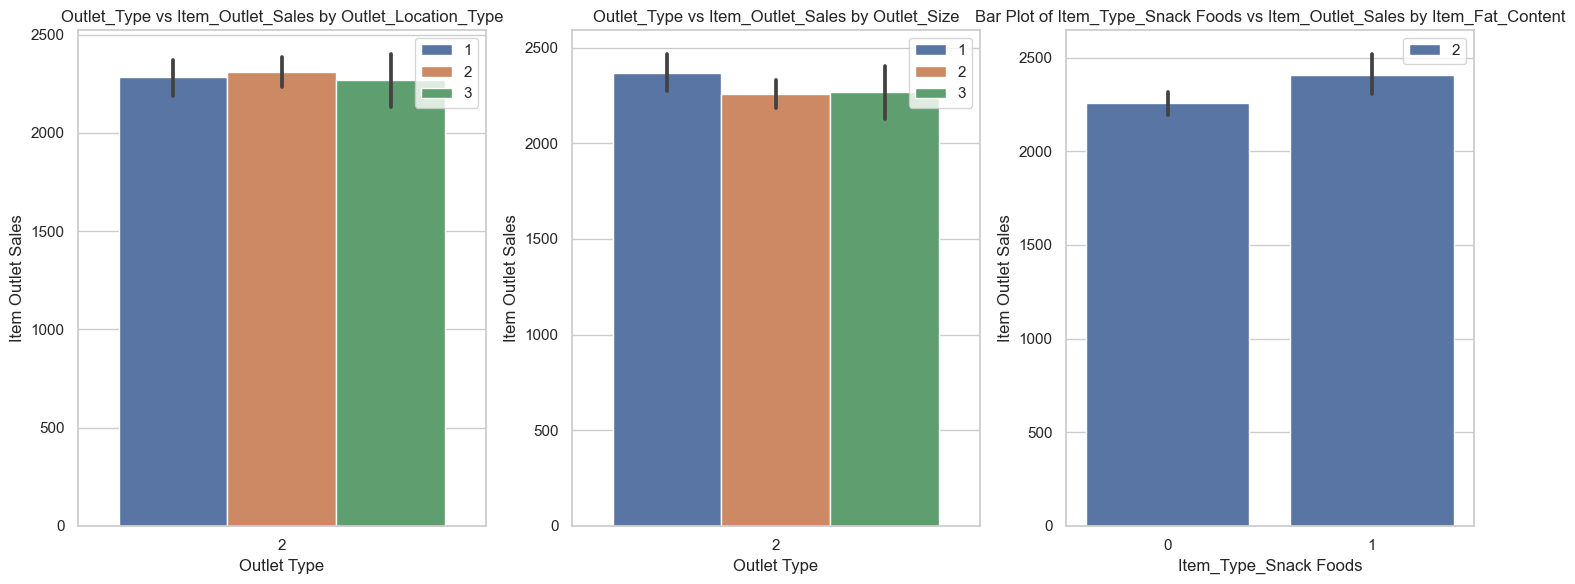

In [182]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# First plot
plt.subplot(1, 3, 1)
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', data=df)
plt.title('Outlet_Type vs Item_Outlet_Sales by Outlet_Location_Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.legend()

# Second plot
plt.subplot(1, 3, 2)
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=df)
plt.title('Outlet_Type vs Item_Outlet_Sales by Outlet_Size')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.legend()

#Third plot
plt.subplot(1, 3, 3)
sns.barplot(x='Item_Type_Snack Foods', y='Item_Outlet_Sales', hue='Outlet_Type', data=df)
plt.title('Bar Plot of Item_Type_Snack Foods vs Item_Outlet_Sales by Item_Fat_Content')
plt.xlabel('Item_Type_Snack Foods')
plt.ylabel('Item Outlet Sales')
plt.legend()


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Feature scaling

After joinig Train and Test data into df dataset to perform the data processing,it is now time to separate them once agoin so we can train and test our ML models

In [183]:
df_train=df[~df['Item_Outlet_Sales'].isnull()] #this is the data for the trainig 
df_test=df[df['Item_Outlet_Sales'].isnull()]   #this is the data for the test,

In [184]:
x=df_train.drop('Item_Outlet_Sales',axis=1)
y=df_train['Item_Outlet_Sales']

Split the df_train(the train data)

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [186]:
#feature scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Now the Machine Learnning lodels

### Linear Regression

In [187]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(x_train, y_train)

# Make predictions on the scaled testing data
y_pred = model.predict(x_test)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1187977.1100953852


The scatter plot compares the actual sales values (y_test) against the predicted sales values (y_pred).

The residual plot shows the relationship between the predicted sales values and the residuals (differences between actual and predicted values).

The normality plot (Q-Q plot) helps us assess whether the residuals follow a normal distribution.

The coefficient plot visualizes the coefficients of the independent variables. It shows the impact of each feature on the target variable.

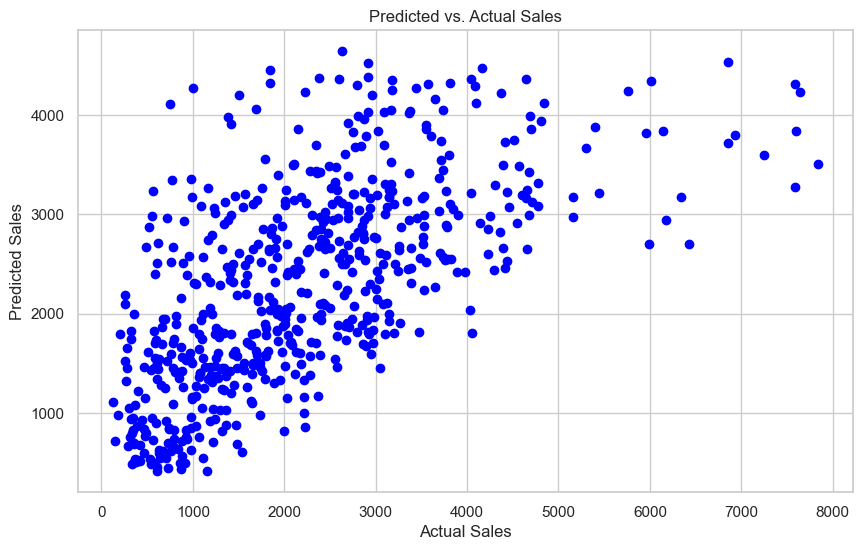

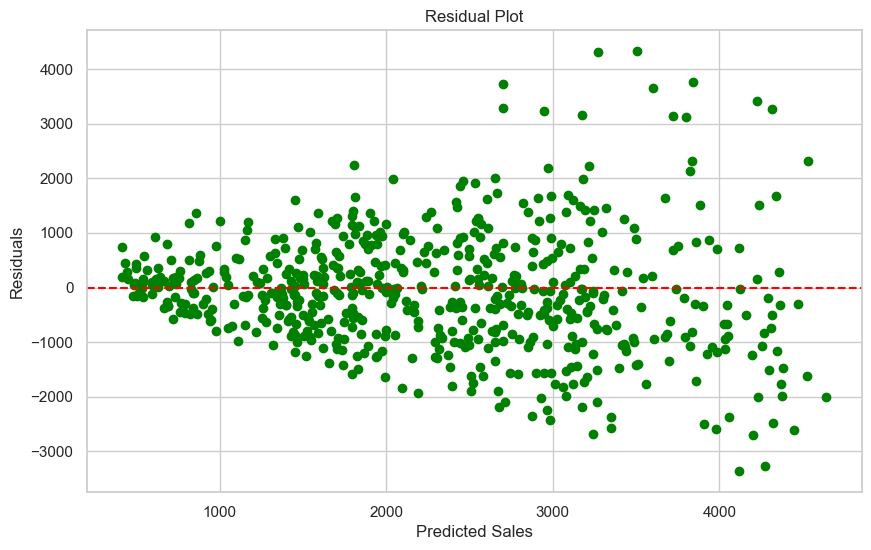

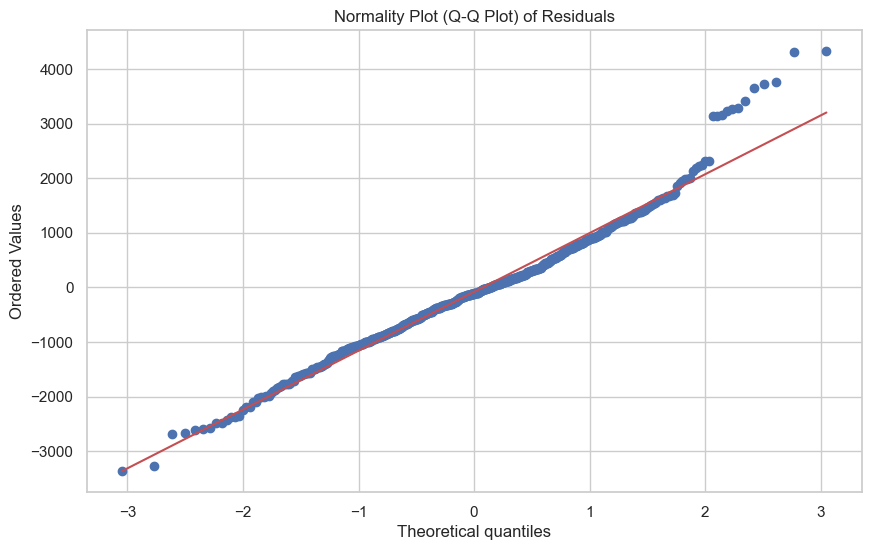

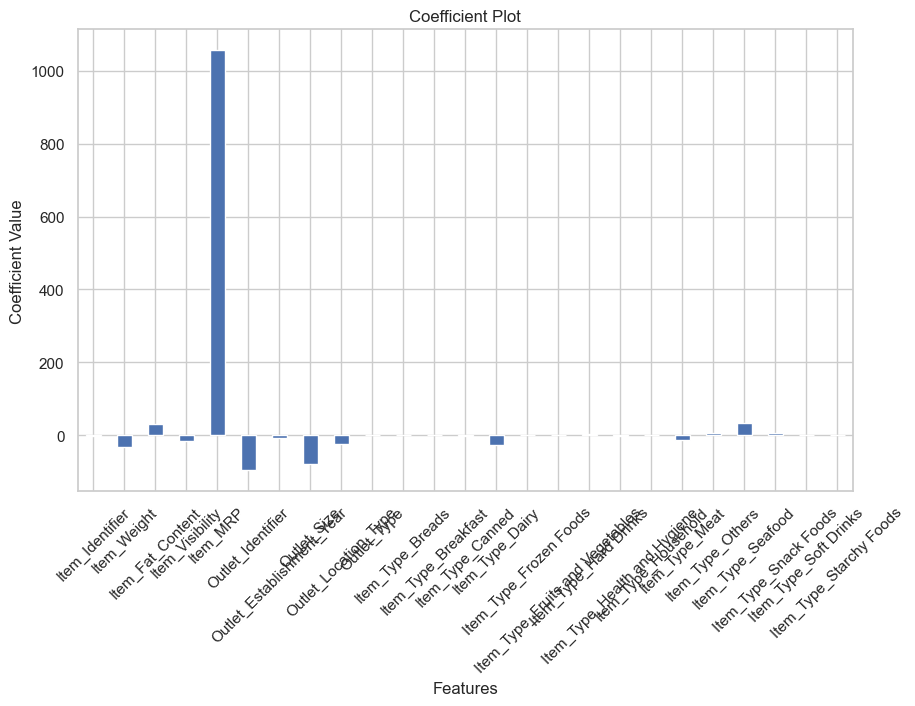

In [188]:
# Scatter plot of predicted vs. actual sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Predicted vs. Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green')
plt.title('Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0
plt.show()

# Normality plot (Q-Q plot) of residuals
plt.figure(figsize=(10, 6))
probplot(residuals, plot=plt)
plt.title('Normality Plot (Q-Q Plot) of Residuals')
plt.show()

# Coefficient plot
coefficients = pd.Series(model.coef_, index=x.columns)
coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Coefficient Plot')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()


### Regularized linear regression

To find the best parameter (alpha) for Lasso and Ridge regularization, we will perform a hyperparameter tuning

process using cross-validation

In [189]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search over
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]  # You can adjust this list

# Create a parameter grid for Lasso and Ridge models
lasso_param_grid = {'alpha': alpha_values}
ridge_param_grid = {'alpha': alpha_values}

# Initialize Regularized Linear Regression models
lasso = Lasso()
ridge = Ridge()

# Initialize GridSearchCV for Lasso and Ridge with cross-validation
lasso_cv = GridSearchCV(lasso, lasso_param_grid, cv=5)
ridge_cv = GridSearchCV(ridge, ridge_param_grid, cv=5)

# Train GridSearchCV on the training data
lasso_cv.fit(x_train, y_train)
ridge_cv.fit(x_train, y_train)

# Get the best alpha values from the grid search
best_alpha_lasso = lasso_cv.best_params_['alpha']
best_alpha_ridge = ridge_cv.best_params_['alpha']

print("Best Lasso Alpha:", best_alpha_lasso)
print("Best Ridge Alpha:", best_alpha_ridge)


Best Lasso Alpha: 10.0
Best Ridge Alpha: 10.0


In [190]:
# Initialize Regularized Linear Regression models
lasso = Lasso(alpha=best_alpha_lasso)  
ridge = Ridge(alpha=best_alpha_ridge)  

# Train the Lasso model
lasso.fit(x_train, y_train)

# Train the Ridge model
ridge.fit(x_train, y_train)

y_pred_lasso = lasso.predict(x_test)
y_pred_ridge = ridge.predict(x_test)



# Calculate performance metrics for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)


# Calculate performance metrics for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Print the performance metrics
print("Lasso Performance Metrics:")
print("MSE:", mse_lasso)
print("MAE:", mae_lasso)

print("\nRidge Performance Metrics:")
print("MSE:", mse_ridge)
print("MAE:", mae_ridge)




Lasso Performance Metrics:
MSE: 1185970.2080903507
MAE: 814.3796554971156

Ridge Performance Metrics:
MSE: 1187026.449618885
MAE: 815.0234121796116


The Lasso model has a slightly lower MSE and MAE compared to the Ridge model. Therefore, based on these metrics alone, the Lasso model appears to be performing slightly better

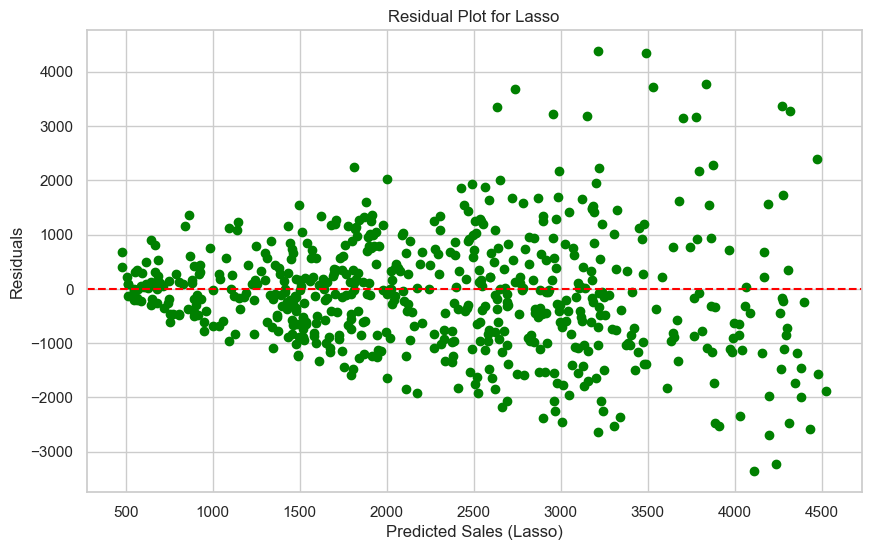

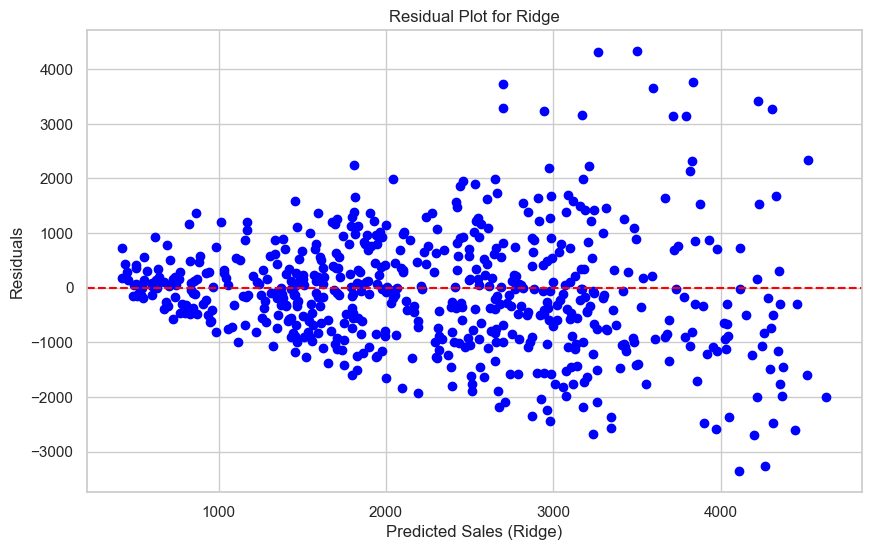

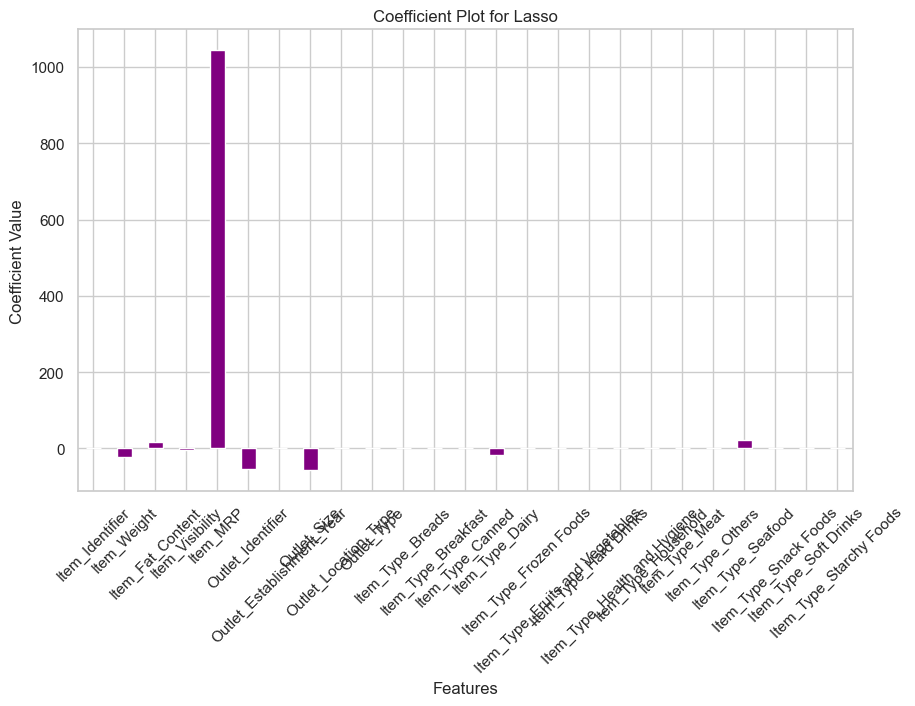

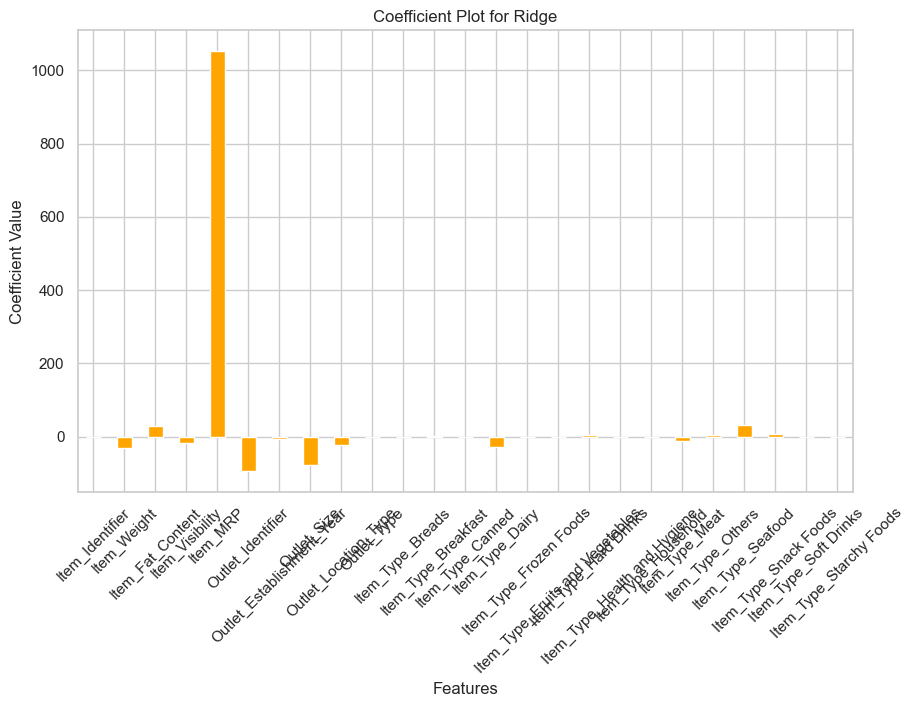

In [191]:
# Residual plots for Lasso
residuals_lasso = y_test - y_pred_lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lasso, residuals_lasso, color='green')
plt.title('Residual Plot for Lasso')
plt.xlabel('Predicted Sales (Lasso)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0
plt.show()

# Residual plots for Ridge
residuals_ridge = y_test - y_pred_ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals_ridge, color='blue')
plt.title('Residual Plot for Ridge')
plt.xlabel('Predicted Sales (Ridge)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0
plt.show()

# Coefficient plots for Lasso
lasso_coefficients = pd.Series(lasso.coef_, index=x.columns)
plt.figure(figsize=(10, 6))
lasso_coefficients.plot(kind='bar', color='purple')
plt.title('Coefficient Plot for Lasso')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()

# Coefficient plots for Ridge
ridge_coefficients = pd.Series(ridge.coef_, index=x.columns)
plt.figure(figsize=(10, 6))
ridge_coefficients.plot(kind='bar', color='orange')
plt.title('Coefficient Plot for Ridge')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()


### Random Forest

In [192]:
# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  

# Train the model on the training data
rf_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(x_test)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)

print("Random Forest MSE:", mse)


Random Forest MSE: 1320134.3149214971


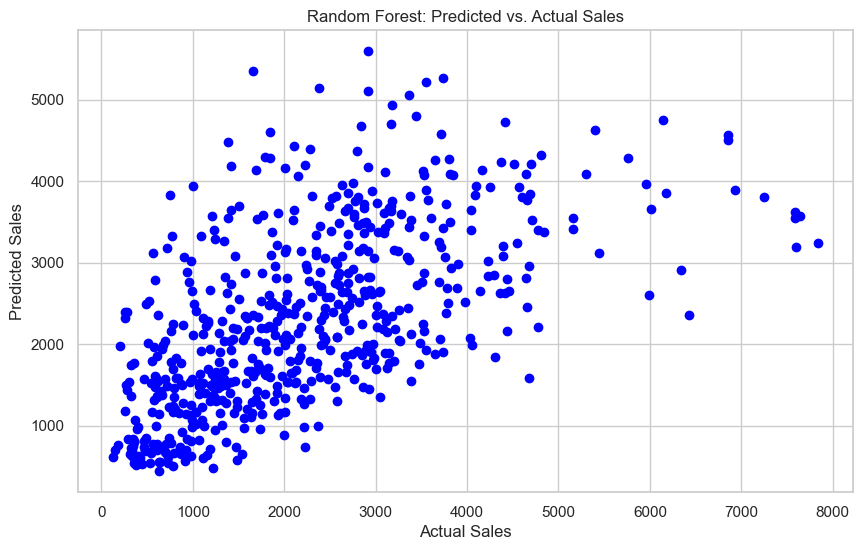

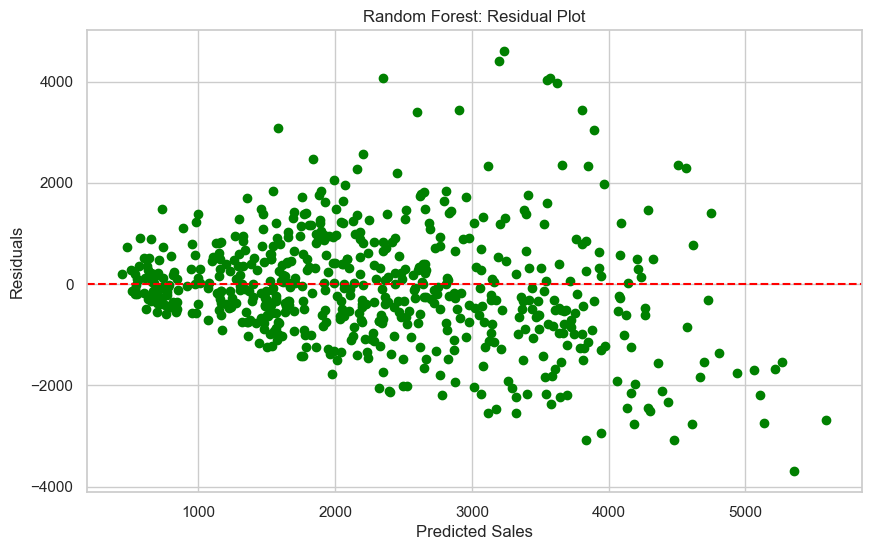

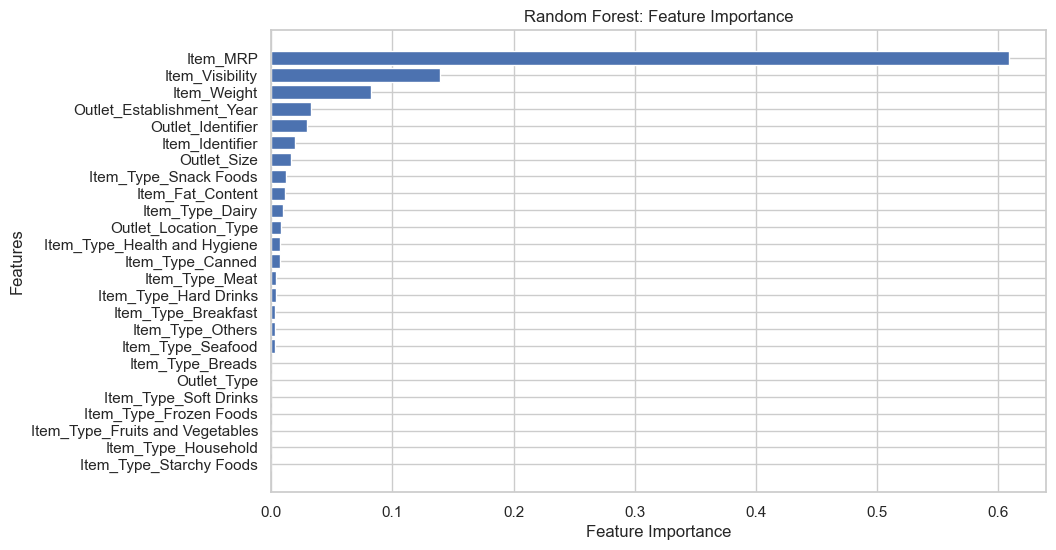

In [193]:
# Scatter plot of predicted vs. actual sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Random Forest: Predicted vs. Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green')
plt.title('Random Forest: Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  
plt.show()

# Feature Importance plot
feature_importance = rf_model.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), x.columns[sorted_idx])
plt.title('Random Forest: Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


### XGboost

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Define parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Perform grid search for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(x_train, y_train)

# Get best parameters for XGBoost
best_params_xgb = grid_search_xgb.best_params_

# Initialize best XGBoost model with best parameters
best_xgb_model = xgb.XGBRegressor(**best_params_xgb, random_state=42)

# Train best XGBoost model on scaled training data
best_xgb_model.fit(x_train, y_train)

# Predict on scaled test data
y_pred_xgb = best_xgb_model.predict(x_test)

# Evaluate XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Best XGBoost Model MSE:", mse_xgb)



Best XGBoost Model MSE: 1171199.5678672493


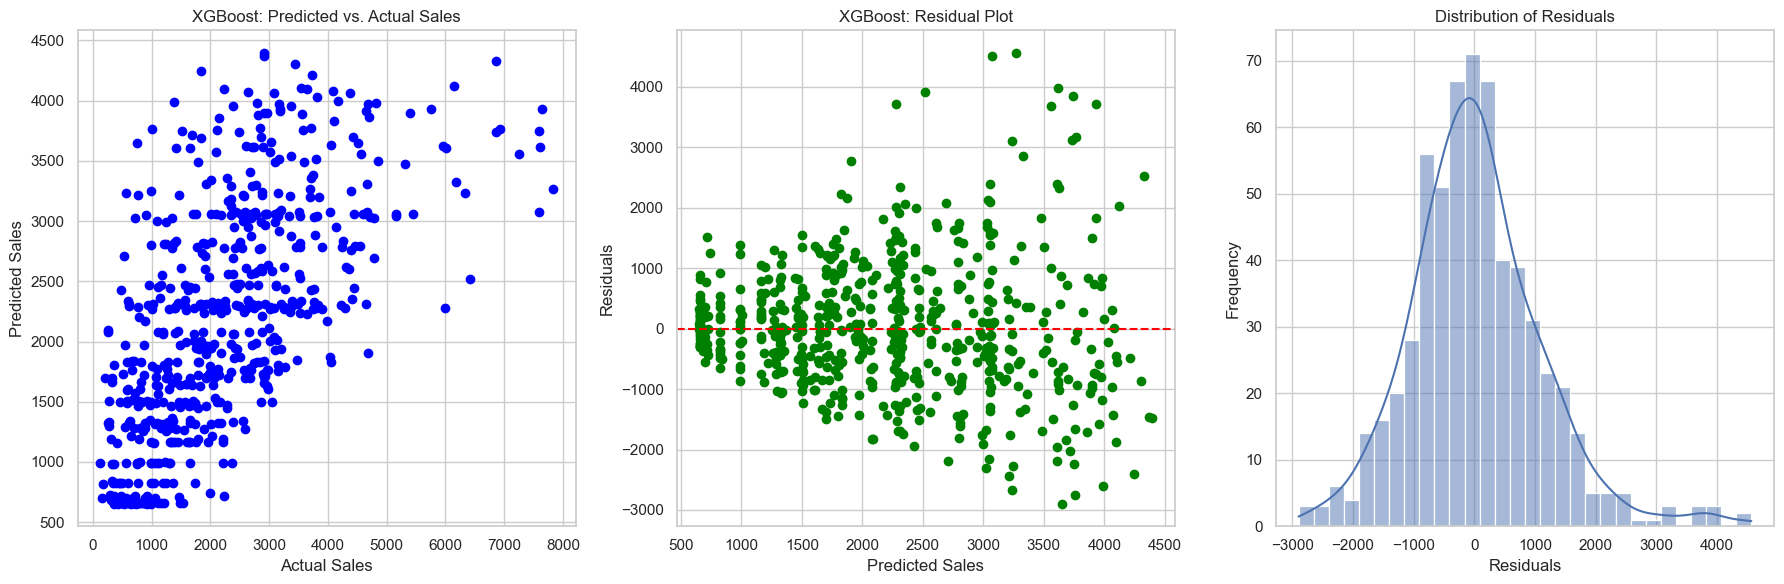

<Figure size 1000x600 with 0 Axes>

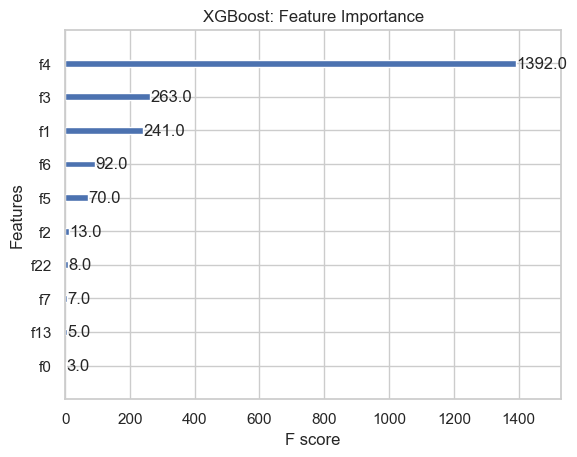

In [195]:
import xgboost as xgb

# Scatter plot of predicted vs. actual sales
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_xgb, color='blue')
plt.title('XGBoost: Predicted vs. Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Residual plot
residuals_xgb = y_test - y_pred_xgb
plt.subplot(1, 3, 2)
plt.scatter(y_pred_xgb, residuals_xgb, color='green')
plt.title('XGBoost: Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0

# Distribution of residuals
plt.subplot(1, 3, 3)
sns.histplot(residuals_xgb, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Feature Importance plot
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_xgb_model, importance_type='weight', title='XGBoost: Feature Importance')
plt.show()



### Gradient Boosting Regressor

In [196]:
# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Define parameter grid for GBR
param_grid_gbr = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Perform grid search for GBR
grid_search_gbr = GridSearchCV(estimator=gbr_model, param_grid=param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(x_train, y_train)

# Get best parameters for GBR
best_params_gbr = grid_search_gbr.best_params_

# Initialize best GBR model with best parameters
best_gbr_model = GradientBoostingRegressor(**best_params_gbr, random_state=42)

# Train best GBR model on scaled training data
best_gbr_model.fit(x_train, y_train)

# Predict on scaled test data
y_pred_gbr = best_gbr_model.predict(x_test)

# Evaluate GBR model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print("Best GBR Model MSE:", mse_gbr)



Best GBR Model MSE: 1173029.4459730156


Comparaison of the performances of the models

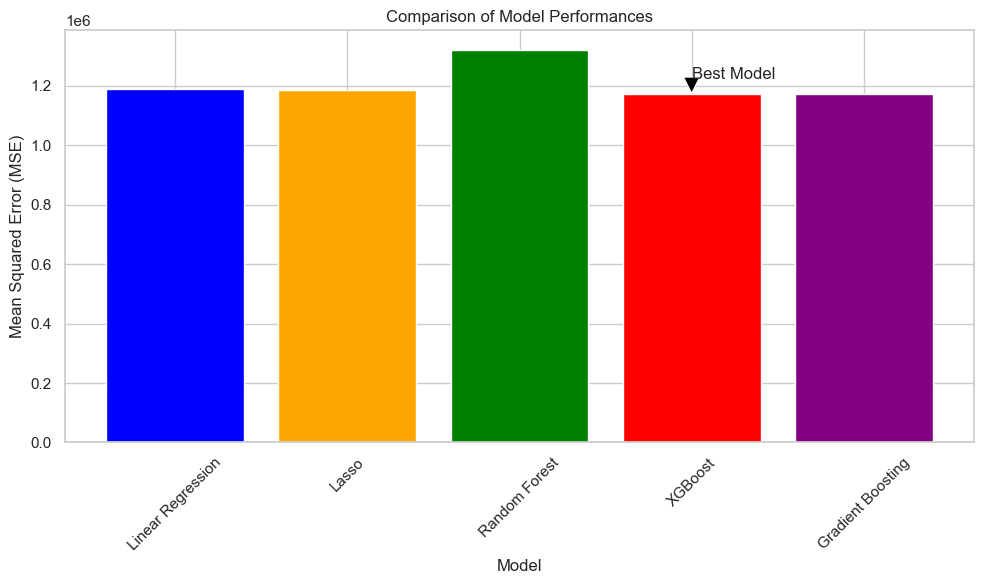

In [205]:


# Mean Squared Errors of different models
mse_values = [1187977.1100953852, 1185970.2080903507, 1320134.3149214971, 1171199.5678672493, 1173029.4459730156]
model_names = ['Linear Regression', 'Lasso', 'Random Forest', 'XGBoost', 'Gradient Boosting']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Comparison of Model Performances')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.tight_layout()

# Highlight the best model
best_model_index = mse_values.index(min(mse_values))
plt.annotate('Best Model', xy=(best_model_index, mse_values[best_model_index]), xytext=(best_model_index, mse_values[best_model_index] + 50000),
             arrowprops=dict(facecolor='black', shrink=0.05),)

# Show the plot
plt.show()


As we can see,XGBoost is the best model 

# Now let's test our models on the Test data

In [197]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9,20.750,0,0.007565,107.8622,49,1999,2,1,2,...,0,0,0,0,0,0,0,1,0,0
1,9,8.300,1,0.038428,87.3198,17,2007,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,9,7.315,0,0.015388,155.0340,17,2007,2,2,2,...,0,0,0,0,0,0,0,1,0,0
8,8,6.305,1,0.123365,95.7436,45,2002,2,2,2,...,0,0,0,0,0,0,0,1,0,0
9,9,5.985,0,0.005698,186.8924,17,2007,2,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5675,9,13.000,1,0.070411,63.4484,49,1999,2,1,2,...,0,0,0,0,0,0,0,1,0,0
5676,10,10.500,1,0.013496,141.3154,46,1997,1,1,2,...,0,0,0,0,0,0,0,1,0,0
5678,9,10.000,0,0.073529,118.7440,45,2002,2,2,2,...,0,0,1,0,0,0,0,0,0,0
5679,10,15.300,1,0.000000,214.6218,17,2007,2,2,2,...,0,0,0,0,0,0,0,0,0,0


In [199]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods'],
      dtype='object')

In [200]:
df_test = df_test.drop(columns=['Item_Outlet_Sales'])


Let's make the predictions with our trained model

In [202]:
y_pred_gbr = best_gbr_model.predict(df_test)   #Gradient Boosting Regressor
y_pred_xgb = best_xgb_model.predict(df_test)    #XGboost
y_pred_rf = rf_model.predict(df_test)              #RandomForest
y_pred_lasso = lasso.predict(df_test)            #lasso Regularized linear regression
y_pred_lr = model.predict(df_test)                   #Linear Regression


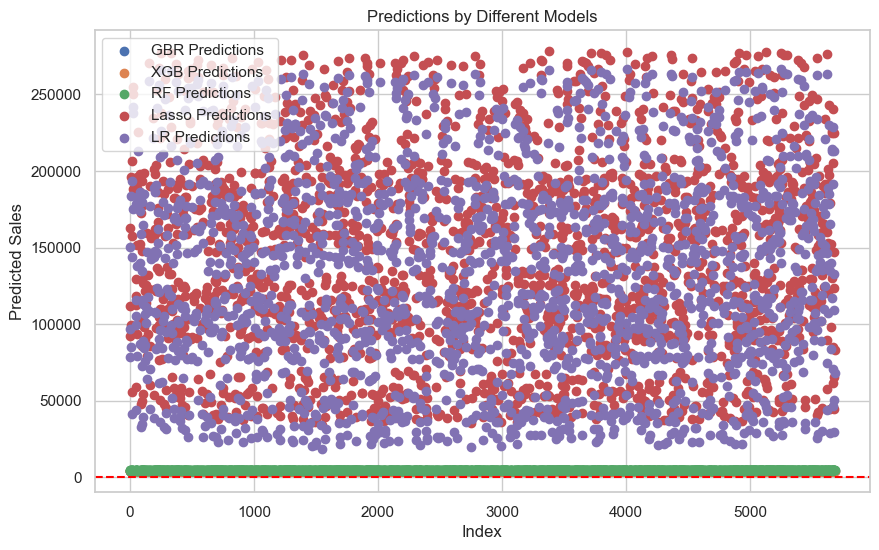

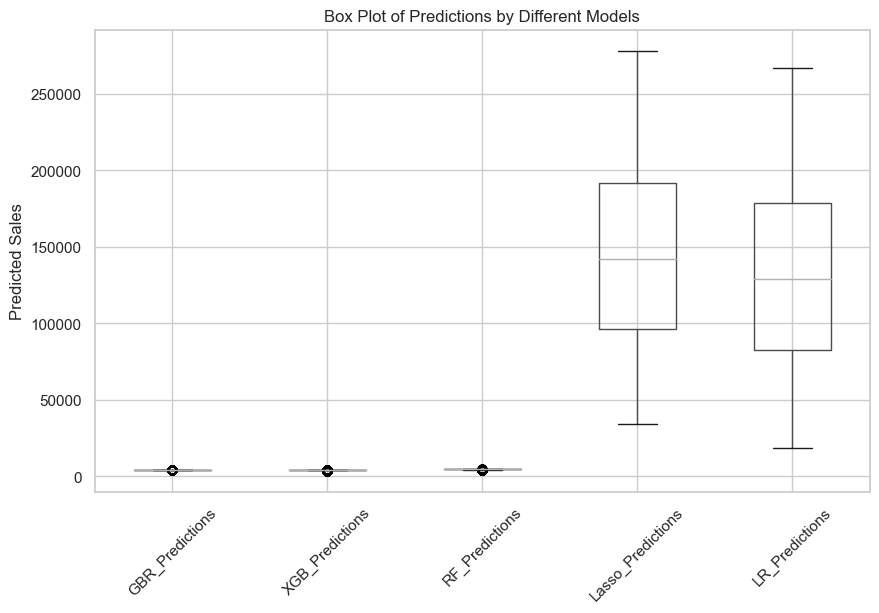

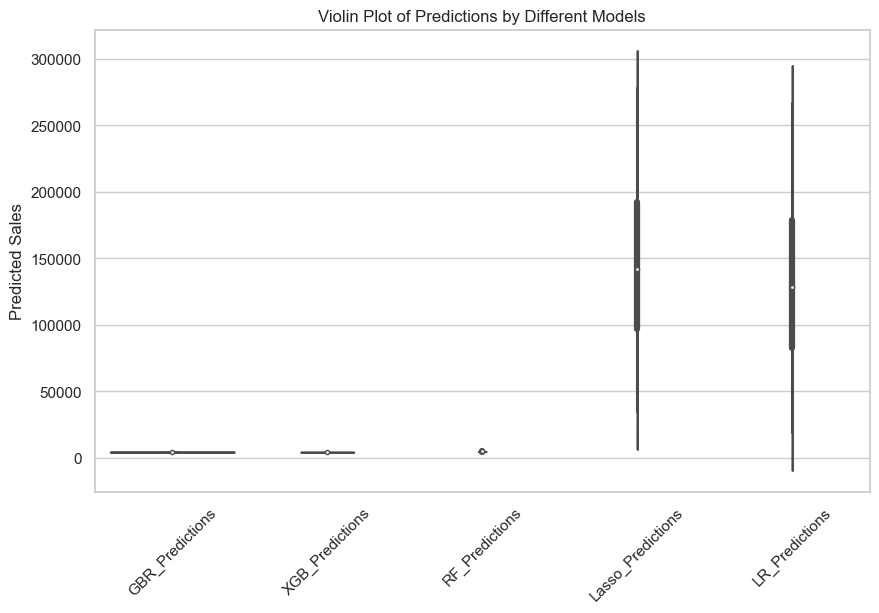

In [204]:
import matplotlib.pyplot as plt

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({
    'GBR_Predictions': y_pred_gbr,
    'XGB_Predictions': y_pred_xgb,
    'RF_Predictions': y_pred_rf,
    'Lasso_Predictions': y_pred_lasso,
    'LR_Predictions': y_pred_lr
})

# Scatter plot of predictions by different models
plt.figure(figsize=(10, 6))
plt.scatter(df_test.index, predictions_df['GBR_Predictions'], label='GBR Predictions')
plt.scatter(df_test.index, predictions_df['XGB_Predictions'], label='XGB Predictions')
plt.scatter(df_test.index, predictions_df['RF_Predictions'], label='RF Predictions')
plt.scatter(df_test.index, predictions_df['Lasso_Predictions'], label='Lasso Predictions')
plt.scatter(df_test.index, predictions_df['LR_Predictions'], label='LR Predictions')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Predictions by Different Models')
plt.xlabel('Index')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()

# Box plot of predictions by different models
plt.figure(figsize=(10, 6))
predictions_df.boxplot()
plt.title('Box Plot of Predictions by Different Models')
plt.ylabel('Predicted Sales')
plt.xticks(rotation=45)
plt.show()



# Violin plot of predictions by different models using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(data=predictions_df)
plt.title('Violin Plot of Predictions by Different Models')
plt.ylabel('Predicted Sales')
plt.xticks(rotation=45)
plt.show()
